<a href="https://colab.research.google.com/github/iiineco/analysis/blob/master/matrix/decomposition/svd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

特異値分解（SVD: singular value decomposition）
=============

定義
-----------------------
$X$ を $U, \Sigma, V$ の積で表せるよう $X$ を分解すること。

実装すること
-----------------------
python のライブラリを使って、SVD の挙動確認と画像のデータ圧縮を試してみる。

https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

### SVD の挙動確認
#### SVD 実行

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd, matrix_rank

# 指数表記なしを設定。
np.set_printoptions(suppress=True) 

# [5 × 3] 行列作成
x_vec = np.random.rand(15)
x_matrix= np.reshape(x_vec, (5, 3))
print('x_matrix')
print(x_matrix)

# SVD 実行
u, s, v = svd(x_matrix, full_matrices=True)

x_matrix
[[0.40463891 0.74787473 0.22787737]
 [0.76112989 0.20459394 0.07024175]
 [0.87216664 0.78812608 0.76785501]
 [0.74498473 0.96711583 0.15273689]
 [0.81124044 0.50102315 0.27820377]]


#### 各行列の成分確認




In [2]:
# U は直交行列
print('U*U^T')
print(u.dot(u.T))
print('U^T*U')
print(u.T.dot(u))
# V は直交行列
print('V*V^T')
print(v.dot(v.T))
print('V^T*V')
print(v.T.dot(v))
# sigma は対角行列＋０成分( ライブラリの戻り値は 0 以外の成分のみ)
print('Sigma')
print(s)
diag_s = np.zeros((5, 3))
diag_s[:3, :3] = np.diag(s)
print('diag Sigma')
print(diag_s)




U*U^T
[[ 1.  0.  0. -0.  0.]
 [ 0.  1.  0.  0. -0.]
 [ 0.  0.  1.  0.  0.]
 [-0.  0.  0.  1.  0.]
 [ 0. -0.  0.  0.  1.]]
U^T*U
[[ 1.  0.  0. -0.  0.]
 [ 0.  1. -0. -0.  0.]
 [ 0. -0.  1.  0. -0.]
 [-0. -0.  0.  1. -0.]
 [ 0.  0. -0. -0.  1.]]
V*V^T
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]
V^T*V
[[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]]
Sigma
[2.31926959 0.53376218 0.45691384]
diag Sigma
[[2.31926959 0.         0.        ]
 [0.         0.53376218 0.        ]
 [0.         0.         0.45691384]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


#### $U, \Sigma, V$ の積が $X$ であることを確認

In [3]:
# v は転置した状態で戻されてるっぽい。転置せず、そのまま積すると True
print('V_T', np.allclose(x_matrix, np.dot(u, np.dot(diag_s, v.T))))
print('V_N', np.allclose(x_matrix, np.dot(u, np.dot(diag_s, v))))

dot_x = np.dot(np.dot(u, diag_s), v)
print('dot_x')
print(dot_x)



V_T False
V_N True
dot_x
[[0.40463891 0.74787473 0.22787737]
 [0.76112989 0.20459394 0.07024175]
 [0.87216664 0.78812608 0.76785501]
 [0.74498473 0.96711583 0.15273689]
 [0.81124044 0.50102315 0.27820377]]


### 画像圧縮
#### 画像読み込み

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

!ls

drive  sample_data


(1410, 2064, 3)

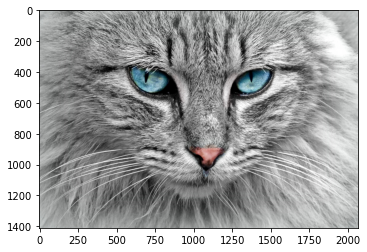

In [5]:
# 画像読み込み
import cv2
orig = cv2.imread('/content/drive/My Drive/Colab Notebooks/data/animal-pet-fur-head-33537.jpg')
# cv2 では色の並び順は BGR だけど matplotlib では RGB
src = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
# cv2 の画像表示だとセッションクラッシュしてしまう
# cv2.imshow('image',orig)

# オリジナル画像表示
from matplotlib import pyplot as plt
plt.imshow(src)
src.shape

(1410, 2064)

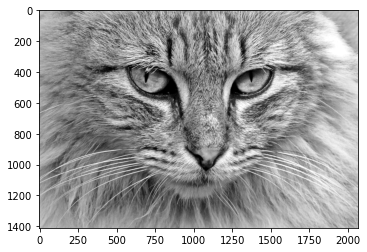

In [6]:
# グレー画像表示
img_gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = "gray")
img_gray.shape

In [0]:
# SVD 実施
u, s, v = svd(img_gray, full_matrices=True)

# 次元削減して画像表示
def dimension_reduction(use_ratio):
    use_dim = int(s.shape[0] * use_ratio)
    print('使用する次元数', use_dim)
    re_u = u[:, 0:use_dim]
    print('re_u', re_u.shape)
    re_s = np.diag(s[0:use_dim])
    print('re_s', re_s.shape)
    re_v = v[0:use_dim, :]
    print('re_v', re_v.shape)
    # 削減した次元で画像再作成
    re_x = np.dot(np.dot(re_u, re_s), re_v)
    print('re_x', re_x.shape)

    # 画像表示
    plt.imshow(re_x, cmap = "gray")
    img_gray.shape

使用する次元数 1
re_u (1410, 1)
re_s (1, 1)
re_v (1, 2064)
re_x (1410, 2064)


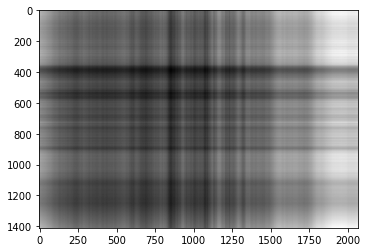

In [8]:
# 削減しすぎ
dimension_reduction(0.001)

使用する次元数 14
re_u (1410, 14)
re_s (14, 14)
re_v (14, 2064)
re_x (1410, 2064)


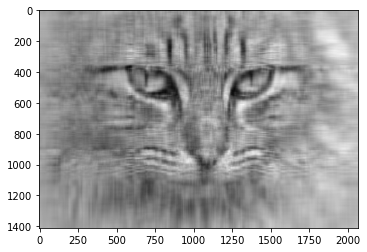

In [9]:
# 1% だとぼやけてる
dimension_reduction(0.01)

使用する次元数 141
re_u (1410, 141)
re_s (141, 141)
re_v (141, 2064)
re_x (1410, 2064)


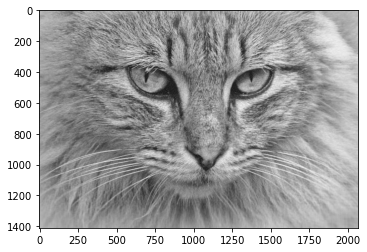

In [10]:
# 10% でもそれなりにわかる
dimension_reduction(0.1)

使用する次元数 1410
re_u (1410, 1410)
re_s (1410, 1410)
re_v (1410, 2064)
re_x (1410, 2064)


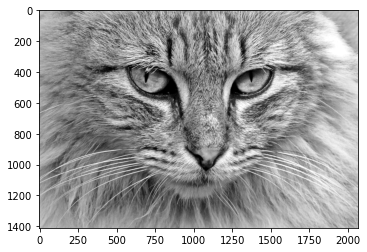

In [11]:
# 100% で元の次元数のまま。くっきりする。
dimension_reduction(1)

補足：直交行列を作成するライブラリを確認してみた


In [12]:
# 直交行列を作成するライブラリの確認
import numpy as np
from scipy.stats import ortho_group

# 直交行列作成
u_matrix = ortho_group.rvs(dim=3) 

# u_matrix が直交行列であることを確認。
print('U*U^T', u_matrix.dot(u_matrix.T) )
print('U^T*U', u_matrix.T.dot(u_matrix) )

U*U^T [[ 1. -0.  0.]
 [-0.  1. -0.]
 [ 0. -0.  1.]]
U^T*U [[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]
